# Exercício 11.18: Gauss-Seidel

### Utilizar Gauss-Seidel (a) sem relaxamento e (b) com relaxamento, utilizando lambda = 1.2
epsilon-s = 10^-4 %

                       zinco, vidro, cobre


transistor                1,   2,    4         
resistor                  3,   1,    3
chip de computador        1,   3,    2


                         510,  610, 960     material supply


    
    
    
A matriz B é a mesma.

In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

%matplotlib inline

# (a) Sem relaxamento

In [2]:
#matrix declaration:
# transistor     /    resistor    /     chip de computador 
m = np.array([    [4,3,2,960],
                  [1,3,1,510],
                  [2,1,3,610],
                  
                       ])

m = m.astype('float64')

In [3]:
x1 = 0
x2 = 0
x3 = 0
i = 0

respostas1 = [0]

error = 5

while error > 0.0001:
    
    i += 1
    
    x1 = (m[0][3] - m[0][1]*x2 - m[0][2]*x3) / m[0][0]
    
    respostas1.append(x1)
    
    x2 = (m[1][3] - m[1][0]*x1 - m[1][2]*x3) / m[1][1]
    
    x3 = (m[2][3] - m[2][0]*x1 - m[2][1]*x2) / m[2][2]
    
    error = math.fabs(100*(x1 - respostas1[i-1])/x1)


print(x1)
print(x2)
print(x3)
print(i)
print(error)

120.0000056766003
99.9999872818397
90.00000045498656
18
3.3152549192654695e-05


In [4]:
# O erro target foi setado para um valor extremamente baixo. Com 18 iterações se chegou aos valores para x1, x2 e x3, os quais correspondem aos valores reais.

# (b) Com relaxamento (lambda = 1.2)

In [11]:
def gauss_seidel_relax(Lambda, m):
    x1 = 0
    x2 = 0
    x3 = 0
    i = 0
    dummy1 = [0]
    dummy2 = [0]
    dummy3 = [0]
    error = 5

    while error > 0.0001:

        i += 1
        x1 = (m[0][3] - m[0][1]*x2 - m[0][2]*x3) / m[0][0]
        x1 *= Lambda
        x1 += (1-Lambda)*dummy1[i-1]

        dummy1.append(x1)

        x2 = (m[1][3] - m[1][0]*x1 - m[1][2]*x3) / m[1][1]
        x2 *= Lambda
        x2 += (1-Lambda)*dummy2[i-1]

        dummy2.append(x2)

        x3 = (m[2][3] - m[2][0]*x1 - m[2][1]*x2) / m[2][2]
        x3 *= Lambda
        x3 += (1-Lambda)*dummy3[i-1]

        dummy3.append(x3)

        error = math.fabs(100*(x1 - dummy1[i-1])/x1)
        
    return i, x1, x2, x3, error

In [23]:
print(gauss_seidel_relax(1.2, m))
# i, x1, x2, x3, error

(17, 120.0009161795576, 100.00008557803079, 89.99938816506584, 1.153877743461685e-05)


### Abaixo serão testados alguns valores de lambda e será feito um gráfico comparativo que apresente o número de iterações frente 
### ao valor de lambda.

In [ ]:
def evaluate(range_for_evaluation, function):
    ordinate = []
    for i in range_for_evaluation:
        ordinate.append(function(i, m)[0])
    return ordinate

In [58]:
lambdas = [0.01*i + 0.5 for i in range(50)]

In [59]:
iters = evaluate(lambdas, gauss_seidel_relax)

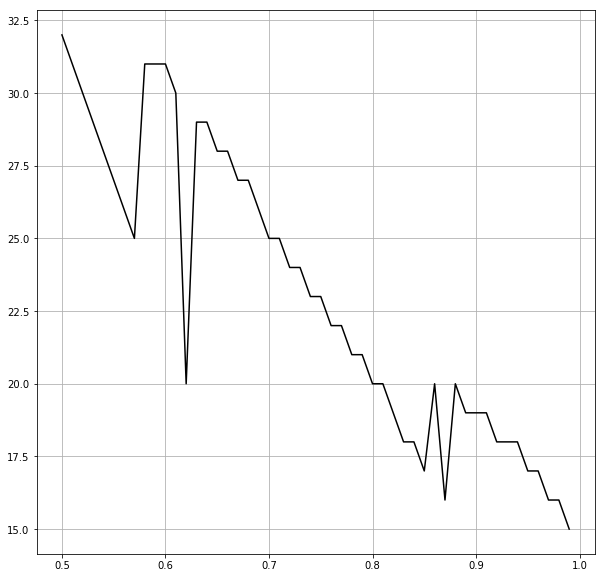

In [63]:
plt.figure(figsize=(10,10))


plt.subplot(221)
plt.plot(lambdas, iters, color="black")
plt.grid()
plt.title('Lambda variando de a a b')
plt.xlabel('Lambda')
plt.ylabel('Iterações')







plt.tight_layout()
plt.show()

## Comentário

A relaxação serve para "andar mais rápido", bem como garantir a convergência. Nesse caso, porém, demorou apenas uma iteração a menos para chegar à resposta.

É essencial que se utilize a diagonal dominante, a fim de garantir a convergência do método de Gauss-Seidel.